# Australian Banks Stocks
An analysis of main australian banks stocks and their fluctuation between 2014 and 2017.

In [56]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data, wb

In [57]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)

In [58]:
cf.go_offline()
sns.set_style('whitegrid')
cf.go_offline()
%matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
end = datetime.datetime(2018, 1, 1)
start = datetime.datetime(2014, 1, 1)

## Data Preparation
Historic stock data starting from 2014 till end of 2017 has been fetched from Investors Exchange (IEX) online database. Following institutions are considered the "big four" of Australia in Banking Industry:

<br>Commonwealth
<br>Westpac
<br>ANZ
<br>NAB

<br>**Note: Google Finance has stopped providing historic data starting from late 2017 and IEX doesn't provide any historic data related to ANZ and NAB.**

In [3]:
# Westpac Group
WBC = data.DataReader("WBC", "iex", start, end)

# Commonwealth Group
CBA = data.DataReader("CBA", "iex", start, end)

# ANZ
# ANZ = data.DataReader("WBC", "iex", start, end)

# Commonwealth Group
# NAB = data.DataReader("CBA", "iex", start, end)

5y
5y


In [4]:
tickers = ["WBC", "CBA"]
ins_stocks = pd.concat([WBC, CBA], axis=1, keys=tickers)
ins_stocks.columns.names = ['Company Tickers', "Stock Info"]

# ANZ and NAB removed

In [5]:
ins_stocks.head()

Company Tickers    WBC                                     CBA           \
Stock Info        open    high     low  close  volume     open     high   
date                                                                      
2014-01-02       93.11  93.408  91.740  92.20  225924  12.2569  12.2954   
2014-01-03       92.18  92.870  91.830  92.55  216191  12.1406  12.1610   
2014-01-06       92.73  93.140  92.140  92.71  332910  12.1337  12.2021   
2014-01-07       92.91  94.200  91.955  94.01  334007  12.2569  12.3663   
2014-01-08       93.97  94.420  92.480  92.80  411053  12.3116  12.3335   

Company Tickers                            
Stock Info           low    close  volume  
date                                       
2014-01-02       12.0636  12.1064  168520  
2014-01-03       12.0175  12.1064  122665  
2014-01-06       11.8841  12.1474  231964  
2014-01-07       12.0893  12.3458  362771  
2014-01-08       12.1064  12.2227  208895

#### Preparing Returns Dataframe
A dataframe containing returns of these three institution's stock. Returns defines as:
Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Note: Dates that stocks were close are demonstrated by 'NaN'

In [6]:
returns = pd.DataFrame()
for ins in tickers:
    returns[ins + " Returns"] = ins_stocks[ins]['close'].pct_change()

In [7]:
returns.head()

,WBC Returns,CBA Returns
date,,
2014-01-02,NaN,NaN
2014-01-03,0.003796,0.000000
2014-01-06,0.001729,0.003387
2014-01-07,0.014022,0.016333
2014-01-08,-0.012871,-0.009971


## Data Exploration
Historic stock data has been downloaded and successfully arranged in pandas dataframes. Now it's time to explore data.

In [8]:
# Getting the maximum close for each company
ins_stocks.xs(key='close', axis=1, level='Stock Info').max()

Company Tickers
WBC    155.0800
CBA     13.7828
dtype: float64

In [9]:
# Getting the best and worst single day returns
returns.idxmax()

WBC Returns    2016-07-20
CBA Returns    2016-01-22
dtype: object

In [10]:
returns.idxmin()

WBC Returns    2016-06-24
CBA Returns    2016-01-20
dtype: object

In [11]:
# Getting standard deviations. It shows investing on Commonwealth is around %15 more risky
returns.std()

WBC Returns    0.015601
CBA Returns    0.021715
dtype: float64

## Visual Analysis
Historic stock data is visualised using Python reporting technologies for further analysis

In [12]:
# Setting colors for better presentation
wstc = ["#d83742", "#455660"]
cmwc = ["#eecc4b","#040b0f"]
mixed = ["#d83742", "#eecc4b"]
sns.set_palette(cmwc)
sns.set_palette(wstc)
sns.set_palette(mixed)

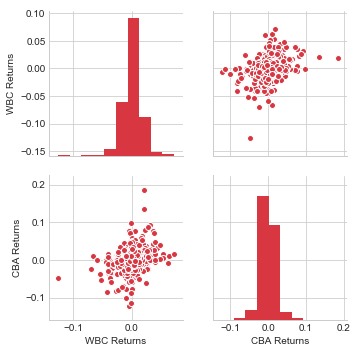

In [13]:
sns.pairplot(returns[1:])

/Users/sepehr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



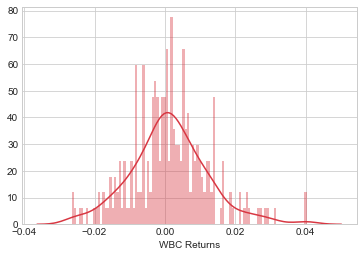

In [14]:
# Investigating the distribution of returns in last year
sns.distplot(returns.ix['2017-01-01':'2017-12-31']['WBC Returns'], color='#d83742' ,bins=100)

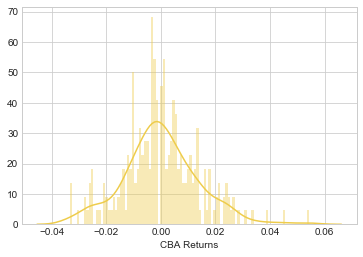

In [15]:
sns.distplot(returns.ix['2017-01-01':'2017-12-31']['CBA Returns'],color='#eecc4b',bins=100)
# As concluded above, distribution of returns of Commonwealth has a wider range

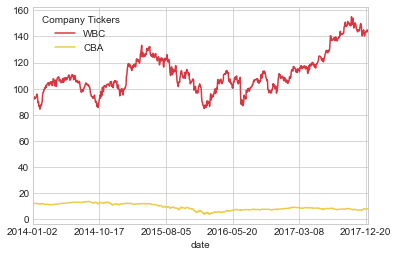

In [42]:
ins_stocks.xs(key='close',axis=1,level='Stock Info').plot()
#A line plot showing Close price for each bank for the entire index of time

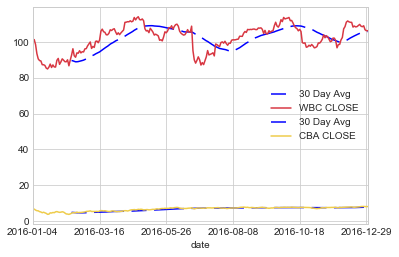

In [43]:
# Investigating moving 30 days avarages in the past year help investors to determine how should they invest their capital
WBC['close'].ix['2016-01-01':'2017-01-01'].rolling(window=30).mean().plot(label='30 Day Avg', color='blue', dashes=[10, 5, 20, 5])
WBC['close'].ix['2016-01-01':'2017-01-01'].plot(label='WBC CLOSE')
CBA['close'].ix['2016-01-01':'2017-01-01'].rolling(window=30).mean().plot(label='30 Day Avg', color='blue', dashes=[10, 5, 20, 5])
CBA['close'].ix['2016-01-01':'2017-01-01'].plot(label='CBA CLOSE')
plt.legend()

In [60]:
ins_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

In [61]:
WBC['close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')